# RERUN THESE CELLS AFTER REFRESHING OR OPENING THE NOTEBOOK

Click the play button on the left side of the notebook to run a cell

## Import libraries

Import the libraries that are used throughout the rest of the notebook

In [ ]:
# @title Import libraries
import ast
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import display

%matplotlib inline

sns.set_theme(context='notebook', style='darkgrid')

## Load data

We're going to use pandas to load the data that will be used in the rest of the notebook

In [ ]:
# @title Load data


demographics_columns = [
    "RIAGENDR", "RIDAGEYR", "RIDRETH1", "DMDEDUC3", "DMDEDUC2", "INDHHIN2", "INDFMIN2"
]
examination_columns = [
    "BPXPLS", "BPXSY1", "BPXDI1", "BPXSY2", "BPXDI2", "BMXWT", "BMXHT", "BMXBMI", "BMXWAIST", "BMXHIP",
]
lab_columns = [
     "LBDHDD", "LBXTC", "LBXGLU", "LBXGH", "LBXTR", "LBDLDL", "LBDLDLM", "LBDLDLN",
]
questionnaire_columns = [
    "DIQ010"
]

demographics_df = pd.read_csv('https://raw.githubusercontent.com/RileyZurrin/NHANES_Extractor/main/Data_scraper/NHANES_2017-2018/demographics.csv').set_index('SEQN')
dietary_df = pd.read_csv('https://raw.githubusercontent.com/RileyZurrin/NHANES_Extractor/main/Data_scraper/NHANES_2017-2018/dietary.csv').set_index('SEQN')
examination_df = pd.read_csv('https://raw.githubusercontent.com/RileyZurrin/NHANES_Extractor/main/Data_scraper/NHANES_2017-2018/examination.csv').set_index('SEQN')
labs_df = pd.read_csv('https://raw.githubusercontent.com/RileyZurrin/NHANES_Extractor/main/Data_scraper/NHANES_2017-2018/laboratory.csv').set_index('SEQN')
questionnaire_df = pd.read_csv('https://raw.githubusercontent.com/RileyZurrin/NHANES_Extractor/main/Data_scraper/NHANES_2017-2018/questionnaire.csv').set_index('SEQN')

encodings_df = pd.read_csv('https://raw.githubusercontent.com/RileyZurrin/NHANES_Extractor/main/Dictionary_scraper/NHANES_2017-2018/encodings.csv')
description_df = pd.read_csv('https://raw.githubusercontent.com/RileyZurrin/NHANES_Extractor/main/Dictionary_scraper/NHANES_2017-2018/descriptions.csv')
master_df = demographics_df[demographics_columns]
master_df = master_df.join(other=[examination_df[examination_columns], labs_df[lab_columns], questionnaire_df[questionnaire_columns]], how="outer")

final_columns = list(master_df.columns)
master_encodings = encodings_df[encodings_df["Variable"].isin(final_columns)]
master_descriptions = description_df[description_df["Variable"].isin(final_columns)]
master_meta_df = master_descriptions.merge(right=master_encodings, on="Variable", how="outer").set_index('Variable')

master_meta_df['Encoding'] = master_meta_df['Encoding'].apply(ast.literal_eval)

categorical_features = [feature for feature in final_columns if len(master_meta_df['Encoding'][feature]) > 1]
continuous_features = [feature for feature in final_columns if feature not in categorical_features]

master_meta_df

,DataType,Label,Plain Description,Target,Encoding
Variable,,,,,
RIAGENDR,demographics,Gender,Gender of the participant.,Both males and females 0 YEARS -150 YEARS,"{1: 'Male', 2: 'Female', '.': 'Missing'}"
RIDAGEYR,demographics,Age in years at screening,Age in years of the participant at the time of...,Both males and females 0 YEARS -150 YEARS,"{80: '80 years of age and over', '.': 'Missing'}"
RIDRETH1,demographics,Race/Hispanic origin,Recode of reported race and Hispanic origin in...,Both males and females 0 YEARS -150 YEARS,"{1: 'Mexican American', 2: 'Other Hispanic', 3..."
DMDEDUC3,demographics,Education level - Children/Youth 6-19,What is the highest grade or level of school {...,Both males and females 6 YEARS -19 YEARS,"{0: 'Never attended / kindergarten only', 1: '..."
DMDEDUC2,demographics,Education level - Adults 20+,What is the highest grade or level of school {...,Both males and females 20 YEARS -150 YEARS,"{1: 'Less than 9th grade', 2: '9-11th grade (I..."
INDHHIN2,demographics,Annual household income,Total household income (reported as a range va...,Both males and females 0 YEARS -150 YEARS,"{1: '$ 0 to $ 4,999', 2: '$ 5,000 to $ 9,999',..."
INDFMIN2,demographics,Annual family income,Total family income (reported as a range value...,Both males and females 0 YEARS -150 YEARS,"{1: '$ 0 to $ 4,999', 2: '$ 5,000 to $ 9,999',..."
BPXPLS,examination,60 sec. pulse (30 sec. pulse * 2),60 sec. pulse (30 sec. pulse * 2),Both males and females 8 YEARS -150 YEARS,{'.': 'Missing'}
BPXSY1,examination,Systolic: Blood pres (1st rdg) mm Hg,Systolic: Blood pressure (first reading) mm Hg,Both males and females 8 YEARS -150 YEARS,{'.': 'Missing'}


# Exploring the dataset

Explore the dataset using the provided plots below.

You can plot a histogram (normalised or unnormalised) of the selected field ('Field to plot'). This can be optionally split using a different field ('Split by') if the split checkbox is ticked.

You can also plot a scatter plot to examine the relationship between two fields ('X axis' and 'Y axis'). This plot can be optinally split using a different field ('Split by') if the split checkbox is ticked.

In [ ]:
# @title Histogram

def plot_histogram(df, field_desc, split_on_desc, normalise, split):
  field = master_meta_df[master_meta_df['Label'] == field_desc].index.values[0]
  if split:
    split_on = master_meta_df[master_meta_df['Label'] == split_on_desc].index.values[0]
  else:
    split_on = None

  palette = 'deep' if split_on else None

  if normalise:
    g = sns.histplot(df, x=field, hue=split_on, stat='probability', common_norm=False, kde=True, palette=palette)
  else:
    g = sns.histplot(df, x=field, hue=split_on, kde=True, palette=palette)

  if split_on:
    label_dict = master_meta_df['Encoding'][split_on]
    for label in g.get_legend().get_texts():
      curr_label = float(label.get_text())
      label.set_text(label_dict[curr_label])

  g.set_xlabel(master_meta_df['Label'][field])


  plt.show()

hist_widgets = widgets.interact(
    plot_histogram,
    df=widgets.fixed(master_df),
    field_desc=widgets.Dropdown(options=master_meta_df['Label'][continuous_features], value=master_meta_df['Label'][19], description='Field to plot:', disabled=False),
    split=widgets.Checkbox(value=True),
    split_on_desc=widgets.Dropdown(options=master_meta_df['Label'][categorical_features], value=master_meta_df['Label'][0], description='Split by:', disabled=False),
    normalise=widgets.Checkbox(value=False),
)

interactive(children=(Dropdown(description='Field to plot:', index=15, options=('60 sec. pulse (30 sec. pulse …

In [ ]:
# @title Scatter plot

def plot_scatter(df, x_desc, y_desc, split, split_desc):
  x_name = master_meta_df[master_meta_df['Label'] == x_desc].index.values[0]
  y_name = master_meta_df[master_meta_df['Label'] == y_desc].index.values[0]
  if split:
    split_on = master_meta_df[master_meta_df['Label'] == split_desc].index.values[0]
  else:
    split_on = None

  palette = 'deep' if split_on else None

  g = sns.scatterplot(data=df, x=x_name, y=y_name, hue=split_on, palette=palette)

  if split_on:
    label_dict = master_meta_df['Encoding'][split_on]
    for label in g.get_legend().get_texts():
      curr_label = float(label.get_text())
      label.set_text(label_dict[curr_label])

  g.set_xlabel(master_meta_df['Label'][x_name])
  g.set_ylabel(master_meta_df['Label'][y_name])

  plt.show()

scatter_widgets = widgets.interact(
    plot_scatter,
    df=widgets.fixed(master_df),
    x_desc=widgets.Dropdown(options=master_meta_df['Label'], value=master_meta_df['Label'][15], description='X axis:', disabled=False),
    y_desc=widgets.Dropdown(options=master_meta_df['Label'], value=master_meta_df['Label'][10], description='Y axis:', disabled=False),
    split=widgets.Checkbox(value=False),
    split_desc=widgets.Dropdown(options=master_meta_df['Label'][categorical_features], value=master_meta_df['Label'][0], description='Split by:', disabled=False),
)

interactive(children=(Dropdown(description='X axis:', index=15, options=('Gender', 'Age in years at screening'…

# Cleaning data

Here we examine the "target" variable that we're hoping to train a model to predict. For this study we've chose the 'DIQ010' field ('Doctor told you have diabetes'). We use this as a proxy for diabetes diagnosis. Can you think of any bias that's introduced by this choice? Is there any way to address this bias?

Let's examine the way 'DIQ010' is coded in our dataset.

In [ ]:
# @title Print possible values for 'DIQ010' and the fraction of entries for all values in the field

print("Possible values for DIQ010:")
print(master_meta_df['Encoding']['DIQ010'])

print("\nCount the fraction for each response:")
master_df['DIQ010'].value_counts(dropna=False) / master_df.shape[0]

Possible values for DIQ010:
{1: 'Yes', 2: 'No', 3: 'Borderline', 7: 'Refused', 9: "Don't know", '.': 'Missing'}

Count the fraction for each response:


DIQ010
2.0    0.844608
1.0    0.096499
NaN    0.038578
3.0    0.019883
9.0    0.000432
Name: count, dtype: float64

We can see that there are low number of 'Don't know' and missing 'NaN' entries. Since there are so few of them we can exclude them from the dataset.

In [ ]:
# @title Clean outcome feature

clean_df = master_df.copy()
clean_df = clean_df[~clean_df['DIQ010'].isin([7,9])]
clean_df = clean_df[~clean_df['DIQ010'].isna()]

Let's now explore the data splitting by diabetes status. Since we've gotten rid of rare occurences we can now normalise the data to have an easier time comparing between groups.

In [ ]:
# @title Explore histogram split by diabetes status

_ = widgets.interact(
    plot_histogram,
    df=widgets.fixed(clean_df),
    field_desc=widgets.Dropdown(options=master_meta_df['Label'][continuous_features], value=master_meta_df['Label'][19], description='Field to plot:', disabled=False),
    split=widgets.Checkbox(value=True),
    split_on_desc=widgets.Dropdown(options=master_meta_df['Label'][categorical_features], value=master_meta_df['Label'][-1], description='Split by:', disabled=False),
    normalise=widgets.Checkbox(value=False),
)

interactive(children=(Dropdown(description='Field to plot:', index=15, options=('60 sec. pulse (30 sec. pulse …

Let's now take a closer look at which columns are missing data, and how much data they're missing.

In [ ]:
# @title Identify columns with missing data
num_rows = clean_df.shape[0]
print("Fraction of missing data points:")
print(clean_df.isna().sum() / num_rows)

Fraction of missing data points:
RIAGENDR    0.000000
RIDAGEYR    0.000000
RIDRETH1    0.000000
DMDEDUC3    0.740695
DMDEDUC2    0.374227
INDHHIN2    0.053975
INDFMIN2    0.052063
BPXPLS      0.242325
BPXSY1      0.291803
BPXDI1      0.291803
BPXSY2      0.262454
BPXDI2      0.262454
BMXWT       0.073653
BMXHT       0.099067
BMXBMI      0.100304
BMXWAIST    0.145620
BMXHIP      0.321264
LBDHDD      0.242775
LBXTC       0.242775
LBXGLU      0.675138
LBXGH       0.320702
LBXTR       0.681547
LBDLDL      0.684471
LBDLDLM     0.684471
LBDLDLN     0.682334
DIQ010      0.000000
dtype: float64


In [ ]:
# @title Drop any field that's missing more than 70% of the values

columns_to_drop = clean_df.columns[((clean_df.isna().sum() / num_rows) > 0.7)].to_list()
print(f"Dropping the following columns {columns_to_drop}")
clean_df.drop(columns_to_drop, axis=1, inplace=True)

Dropping the following columns ['DMDEDUC3']


We can also do the same thing with rows. Let's check if any rows are missing more than half of the fields.

In [ ]:
# @title Drop any row missing more than 50% of the entries

num_columns = len(clean_df.columns)

rows_to_drop = clean_df.index[((clean_df.isna().sum(axis=1) / num_columns) > 0.5)]
print(f"Dropping {len(rows_to_drop)} rows since they're missing more than half of the fields.\n")
clean_df.drop(rows_to_drop, axis=0, inplace=True)

num_rows = clean_df.shape[0]
print("Fraction of missing data points:")
print(clean_df.isna().sum() / num_rows)

new_columns = clean_df.columns.to_list()
categorical_features = [feature for feature in categorical_features if feature in new_columns]
continuous_features = [feature for feature in continuous_features if feature in new_columns]

Dropping 1914 rows since they're missing more than half of the fields.

Fraction of missing data points:
RIAGENDR    0.000000
RIDAGEYR    0.000000
RIDRETH1    0.000000
DMDEDUC2    0.253188
INDHHIN2    0.044276
INDFMIN2    0.041983
BPXPLS      0.037684
BPXSY1      0.099155
BPXDI1      0.099155
BPXSY2      0.061757
BPXDI2      0.061757
BMXWT       0.010460
BMXHT       0.010603
BMXBMI      0.011893
BMXWAIST    0.049004
BMXHIP      0.138415
LBDHDD      0.077662
LBXTC       0.077662
LBXGLU      0.586330
LBXGH       0.138129
LBXTR       0.594354
LBDLDL      0.598080
LBDLDLM     0.598080
LBDLDLN     0.595358
DIQ010      0.000000
dtype: float64


Let's examine the encoding for some of the other fields.

In [ ]:
# @title Print the encodings for the selected categorical features

def print_possible_values(field_desc):
  field_of_interest = master_meta_df[master_meta_df['Label'] == field_desc].index.values[0]
  print(f"Possible values for field {field_desc}:")
  print(master_meta_df['Encoding'][field_of_interest])
  print(f"\nValue counts for {field_desc}")
  print(clean_df[field_of_interest].value_counts(dropna=False))

_ = widgets.interact(
    print_possible_values,
    field_desc=widgets.Dropdown(options=master_meta_df['Label'][categorical_features], value=master_meta_df['Label'][categorical_features][0], description='Feature:', disabled=False),
)

interactive(children=(Dropdown(description='Feature:', options=('Gender', 'Age in years at screening', 'Race/H…

In [ ]:
# @title Clean up annual household income

variable_to_update = 'INDHHIN2'
new_name = variable_to_update + '_adjusted'
new_label = 'Adjusted ' + master_meta_df['Label'][variable_to_update]
new_bins = {1: 0, 2: 0, 3: 0, 4: 0, 13: 0, 12: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 2, 10: 2, 14: 2, 15: 3}
new_encoding = {0: '\$ 0 to \$19,999', 1: '\$20,000 to \$54,999', 2: '\$55,000 to \$99,999', 3: '\$100,000 and Over'}

master_meta_df.loc[new_name] = master_meta_df.loc[variable_to_update]

master_meta_df.loc[new_name, 'Label'] = new_label
master_meta_df.at[new_name, 'Encoding'] = new_encoding

clean_df[new_name] = clean_df[variable_to_update].map(new_bins)

clean_df[new_name].value_counts(dropna=False)

if new_name not in categorical_features:
  categorical_features.append(new_name)

_ = widgets.interact(
    plot_histogram,
    df=widgets.fixed(clean_df),
    field_desc=widgets.Dropdown(options=master_meta_df['Label'][continuous_features], value=master_meta_df['Label'][19], description='Field to plot:', disabled=False),
    split=widgets.Checkbox(value=True),
    split_on_desc=widgets.Dropdown(options=master_meta_df['Label'][categorical_features], value=master_meta_df['Label'][categorical_features][-1], description='Split by:', disabled=False),
    normalise=widgets.Checkbox(value=False),
)

interactive(children=(Dropdown(description='Field to plot:', index=15, options=('60 sec. pulse (30 sec. pulse …

Sometimes we need to make executive decisions based on the downstream objective. We know that plasma fasting glucose will be highly predictive of a diabetes diagnosis. However, more than 58% of entries are missing a value for this field. We could either drop this field, drop all entries that are missing values for this field, or try to fill in these values based on the rest of the dataset. Imputing more than 50% of the data for this entry would introduce too much bias. Removing this field completly will deprive our model of key information, and if the goal is to deploy a model that can predict diabetes status we can ensure that plasma fasting glucose is a required parameter. Altogether, for this example we can decide to drop all entries that are missing entries for plasma fasting glucose.

In [ ]:
# @title Drop any entries missing a value for Plasma Fasting Glucose

clean_df = clean_df[~clean_df['LBXGLU'].isna()]

num_rows = clean_df.shape[0]
print("Fraction of missing data points:")
print(clean_df.isna().sum() / num_rows)

Fraction of missing data points:
RIAGENDR             0.000000
RIDAGEYR             0.000000
RIDRETH1             0.000000
DMDEDUC2             0.157257
INDHHIN2             0.043990
INDFMIN2             0.040180
BPXPLS               0.046415
BPXSY1               0.113959
BPXDI1               0.113959
BPXSY2               0.066851
BPXDI2               0.066851
BMXWT                0.015587
BMXHT                0.015241
BMXBMI               0.016280
BMXWAIST             0.047108
BMXHIP               0.045722
LBDHDD               0.019397
LBXTC                0.019397
LBXGLU               0.000000
LBXGH                0.001386
LBXTR                0.019397
LBDLDL               0.028403
LBDLDLM              0.028403
LBDLDLN              0.021822
DIQ010               0.000000
INDHHIN2_adjusted    0.090059
dtype: float64


We can now impute any missing values.

In [ ]:
# @title k-Nearest Neighbours imputation

from sklearn.impute import KNNImputer

missing_value_cat = -99
missing_value_cont = -98

temp_missing_df = clean_df.copy(deep=True)
temp_missing_df[categorical_features] = temp_missing_df[categorical_features].fillna(value=missing_value_cat)
temp_missing_df[continuous_features] = temp_missing_df[continuous_features].fillna(value=missing_value_cont)

knn_imputer_cat = KNNImputer(missing_values=-99, n_neighbors=1)
temp_imputed_df_cat = pd.DataFrame(knn_imputer_cat.fit_transform(temp_missing_df), index=clean_df.index, columns=clean_df.columns)
knn_imputer_cont = KNNImputer(missing_values=-98, n_neighbors=5)
temp_imputed_df_cont = pd.DataFrame(knn_imputer_cont.fit_transform(temp_missing_df), index=clean_df.index, columns=clean_df.columns)
knn_imputed_df = temp_imputed_df_cat
knn_imputed_df[continuous_features] = temp_imputed_df_cont[continuous_features]

Let's explore the clean dataset!

In [ ]:
# @title Plot histogram

_ = widgets.interact(
    plot_histogram,
    df=widgets.fixed(knn_imputed_df),
    field_desc=widgets.Dropdown(options=master_meta_df['Label'][continuous_features], value=master_meta_df['Label'][19], description='Field to plot:', disabled=False),
    split=widgets.Checkbox(value=True),
    split_on_desc=widgets.Dropdown(options=master_meta_df['Label'][categorical_features], value=master_meta_df['Label'][categorical_features[-2]], description='Split by:', disabled=False),
    normalise=widgets.Checkbox(value=False),
)

interactive(children=(Dropdown(description='Field to plot:', index=15, options=('60 sec. pulse (30 sec. pulse …

In [ ]:
# @title Plot scatter

_ = widgets.interact(
    plot_scatter,
    df=widgets.fixed(knn_imputed_df),
    x_desc=widgets.Dropdown(options=master_meta_df['Label'][categorical_features + continuous_features], value=master_meta_df['Label'][categorical_features + continuous_features][1], description='X axis:', disabled=False),
    y_desc=widgets.Dropdown(options=master_meta_df['Label'][categorical_features + continuous_features], value=master_meta_df['Label'][categorical_features + continuous_features][12], description='Y axis:', disabled=False),
    split=widgets.Checkbox(value=False),
    split_desc=widgets.Dropdown(options=master_meta_df['Label'][categorical_features], value=master_meta_df['Label'][0], description='Split by:', disabled=False),
)

interactive(children=(Dropdown(description='X axis:', index=1, options=('Gender', 'Age in years at screening',…

# Standardisation and normalisation

In [ ]:
# @title Standardise and normalise the continuous features

from sklearn.preprocessing import StandardScaler, MinMaxScaler

joint_df = knn_imputed_df.copy(deep=True)
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(joint_df[continuous_features])
columns_standard = [column + '_standard' for column in master_df[continuous_features].columns]

joint_df.loc[:, columns_standard] = X_standard

minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(joint_df[continuous_features])
columns_normal = [column + '_minmax' for column in master_df[continuous_features].columns]

joint_df.loc[:, columns_normal] = X_minmax

In [ ]:
# @title Plot standardised values versus raw data

def plot_standardised(feature_desc, split, split_desc):
  feature_name = master_meta_df[master_meta_df['Label'] == feature_desc].index.values[0]
  standard_name = feature_name + '_standard'
  if split:
    split_on = master_meta_df[master_meta_df['Label'] == split_desc].index.values[0]
  else:
    split_on = None

  palette = 'deep' if split_on else None

  g = sns.scatterplot(data=joint_df, x=feature_name + '_standard', y=feature_name, hue=split_on, palette=palette)

  if split_on:
    label_dict = master_meta_df['Encoding'][split_on]
    for label in g.get_legend().get_texts():
      curr_label = float(label.get_text())
      label.set_text(label_dict[curr_label])

  g.set_xlabel(master_meta_df['Label'][feature_name] + ' Standardised')
  g.set_ylabel(master_meta_df['Label'][feature_name])

  plt.show()


standard_widgets = widgets.interact(
    plot_standardised,
    feature_desc=widgets.Dropdown(options=master_meta_df['Label'][continuous_features], value=master_meta_df['Label'][15], description='Feature to plot:', disabled=False),
    split=widgets.Checkbox(value=False),
    split_desc=widgets.Dropdown(options=master_meta_df['Label'][categorical_features], value=master_meta_df['Label'][0], description='Split by:', disabled=False),
)

interactive(children=(Dropdown(description='Feature to plot:', index=8, options=('60 sec. pulse (30 sec. pulse…

In [ ]:
# @title Plot normalised values versus raw data

def plot_normal(feature_desc, split, split_desc):
  feature_name = master_meta_df[master_meta_df['Label'] == feature_desc].index.values[0]
  standard_name = feature_name + '_normal'
  if split:
    split_on = master_meta_df[master_meta_df['Label'] == split_desc].index.values[0]
  else:
    split_on = None

  palette = 'deep' if split_on else None

  g = sns.scatterplot(data=joint_df, x=feature_name + '_minmax', y=feature_name, hue=split_on, palette=palette)

  if split_on:
    label_dict = master_meta_df['Encoding'][split_on]
    for label in g.get_legend().get_texts():
      curr_label = float(label.get_text())
      label.set_text(label_dict[curr_label])

  g.set_xlabel(master_meta_df['Label'][feature_name] + ' Normalised')
  g.set_ylabel(master_meta_df['Label'][feature_name])

  plt.show()


standard_widgets = widgets.interact(
    plot_normal,
    feature_desc=widgets.Dropdown(options=master_meta_df['Label'][continuous_features], value=master_meta_df['Label'][15], description='Feature to plot:', disabled=False),
    split=widgets.Checkbox(value=False),
    split_desc=widgets.Dropdown(options=master_meta_df['Label'][categorical_features], value=master_meta_df['Label'][0], description='Split by:', disabled=False),
)

interactive(children=(Dropdown(description='Feature to plot:', index=8, options=('60 sec. pulse (30 sec. pulse…

In [ ]:
# @title Visualise standard features

def plot_standard_features(x_desc, y_desc, split, split_desc):
  x_name = master_meta_df[master_meta_df['Label'] == x_desc].index.values[0]
  y_name = master_meta_df[master_meta_df['Label'] == y_desc].index.values[0]

  if split:
    split_on = master_meta_df[master_meta_df['Label'] == split_desc].index.values[0]
  else:
    split_on = None

  palette = 'deep' if split_on else None

  g = sns.scatterplot(data=joint_df, x=x_name + '_standard', y=y_name + '_minmax', hue=split_on, palette=palette)

  if split_on:
    label_dict = master_meta_df['Encoding'][split_on]
    for label in g.get_legend().get_texts():
      curr_label = float(label.get_text())
      label.set_text(label_dict[curr_label])

  g.set_xlabel(master_meta_df['Label'][x_name])
  g.set_ylabel(master_meta_df['Label'][y_name])

  plt.show()


standard_widgets = widgets.interact(
    plot_standard_features,
    df=widgets.fixed(joint_df),
    x_desc=widgets.Dropdown(options=master_meta_df['Label'][continuous_features], value=master_meta_df['Label'][15], description='X axis:', disabled=False),
    y_desc=widgets.Dropdown(options=master_meta_df['Label'][continuous_features], value=master_meta_df['Label'][10], description='Y axis:', disabled=False),
    split=widgets.Checkbox(value=False),
    split_desc=widgets.Dropdown(options=master_meta_df['Label'][categorical_features], value=master_meta_df['Label'][0], description='Split by:', disabled=False),
)

interactive(children=(Dropdown(description='X axis:', index=8, options=('60 sec. pulse (30 sec. pulse * 2)', '…

# Principal component analysis

Variance explained by each principal component


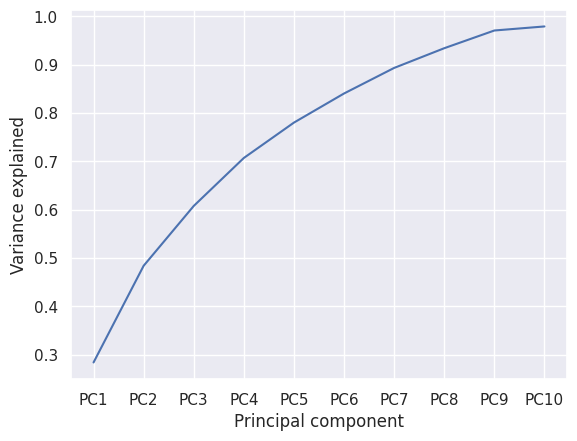

In [ ]:
# @title Run PCA

from sklearn.decomposition import PCA

X_continuous = joint_df[columns_standard]

n_components = 10
pca = PCA(n_components=n_components)
pca_column_labels = [f"PC{i}" for i in range(1, n_components + 1)]

X_continuous_transformed = pca.fit_transform(X_continuous)
joint_df.loc[:, pca_column_labels] = X_continuous_transformed

for name in pca_column_labels:
  master_meta_df.loc[name, 'Label'] = name

explained_variance_cum_sum = [pca.explained_variance_ratio_[0]]

for variance in pca.explained_variance_ratio_[1:]:
  explained_variance_cum_sum.append(explained_variance_cum_sum[-1] + variance)

g = sns.lineplot(x=pca_column_labels, y=explained_variance_cum_sum)
g.set_xlabel('Principal component')
g.set_ylabel('Variance explained')
print('Variance explained by each principal component')

Let's explore the principal component distribution

In [ ]:
# @title Plot a scatter plot of the principal components

_ = widgets.interact(
    plot_scatter,
    df=widgets.fixed(joint_df),
    x_desc=widgets.Dropdown(options=pca_column_labels, value=pca_column_labels[1], description='X axis:', disabled=False),
    y_desc=widgets.Dropdown(options=pca_column_labels, value=pca_column_labels[3], description='Y axis:', disabled=False),
    split=widgets.Checkbox(value=True),
    split_desc=widgets.Dropdown(options=master_meta_df['Label'][categorical_features], value=master_meta_df['Label'][categorical_features[-2]], description='Split by:', disabled=False),
)

interactive(children=(Dropdown(description='X axis:', index=1, options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC…

We can now look at a summary of each principal component compared against all other principal components. We can see that PC2 and PC4 are highly predictive of diabetes status.

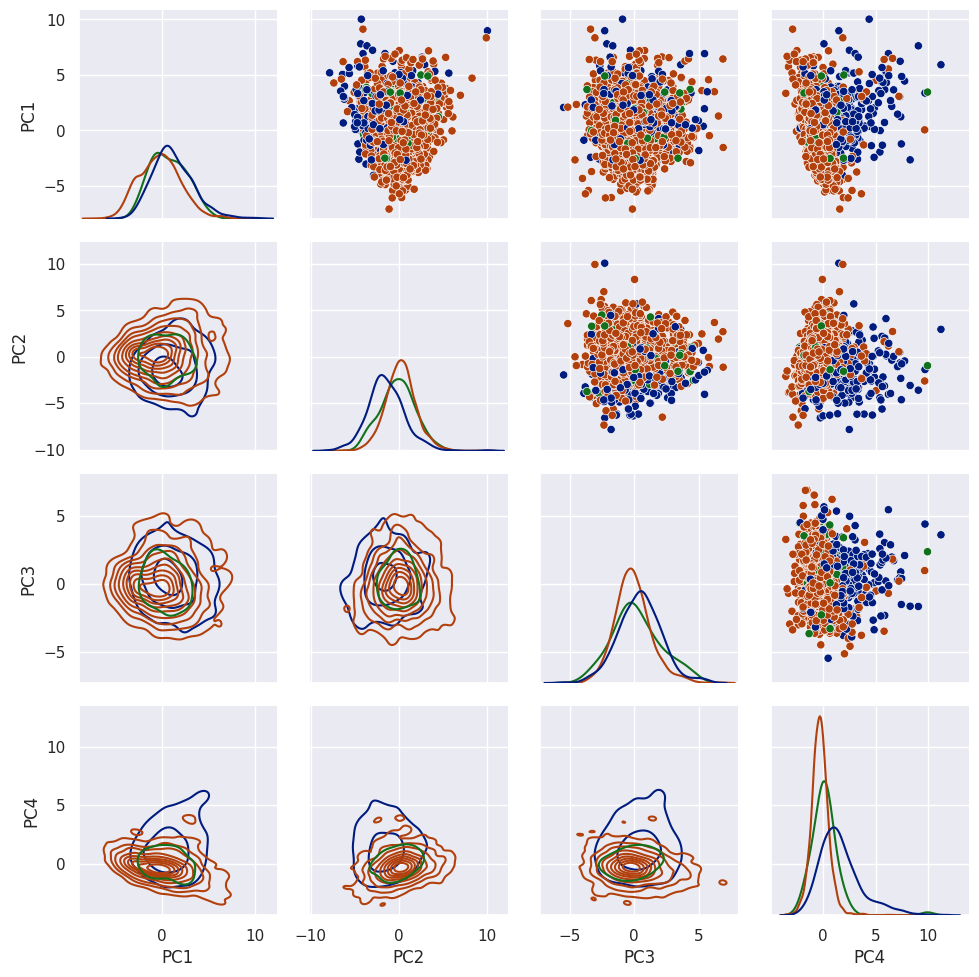

In [ ]:
# @title Plot a summary pair plot for the first 4 principal components
g = sns.PairGrid(joint_df, vars=pca_column_labels[:4], hue='DIQ010', palette='dark')
g.map_diag(sns.kdeplot, common_norm=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

# Troubleshooting

If you are having trouble with running this notebook (e.g. running a cell results in an error, or unexpected result) you may have lost connection to the compute backend. Please refresh the browser (hit continue if prompted) and then run all cells from the beginning. The 'Import libraries' and 'Load data' cells are most important to rerun.

If you are still having issues please message one of the TAs directly on Zoom and they'll be able to provide further support.